
# Deep Learning for Image Classification Assessment

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## The Data

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


## Visualizing the Data

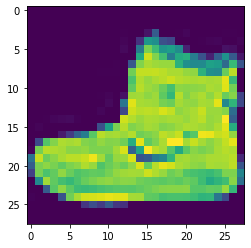

In [5]:
plt.imshow(x_train[0])

## Preprocessing the Data

In [6]:
x_train.max()

255

In [7]:
x_train = x_train / 255

In [8]:
x_test = x_test / 255

## Adding channel dimension

In [10]:
# x_train.shape
x_train = x_train.reshape((60000, 28, 28,1))

In [12]:
# x_test.shape
x_test = x_test.reshape((10000, 28, 28,1))

**Converting the y_train and y_test values to  one-hot encoded for categorical analysis**

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_train_cat = to_categorical(y_train)

In [15]:
y_test_cat = to_categorical(y_test)

## Building the Model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Dropout,MaxPool2D

In [17]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [21]:
model.fit(x_train,y_train_cat,validation_data=(x_test,y_test_cat),epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 252us/sample - loss: 0.3998 - accuracy: 0.8566 - val_loss: 0.3275 - val_accuracy: 0.8830
Epoch 2/10
60000/60000 [==============================] - 12s 202us/sample - loss: 0.2760 - accuracy: 0.8982 - val_loss: 0.2924 - val_accuracy: 0.8945
Epoch 3/10
60000/60000 [==============================] - 13s 212us/sample - loss: 0.2311 - accuracy: 0.9153 - val_loss: 0.2641 - val_accuracy: 0.9033
Epoch 4/10
60000/60000 [==============================] - 13s 212us/sample - loss: 0.1998 - accuracy: 0.9269 - val_loss: 0.2785 - val_accuracy: 0.9044
Epoch 5/10
60000/60000 [==============================] - 13s 213us/sample - loss: 0.1713 - accuracy: 0.9359 - val_loss: 0.2880 - val_accuracy: 0.8995
Epoch 6/10
60000/60000 [==============================] - 13s 219us/sample - loss: 0.1485 - accuracy: 0.9439 - val_loss: 0.2655 - val_accuracy: 0.9092
Epoch 7/10
60000/60000 [====================

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [25]:
losses_accs = pd.DataFrame(model.history.history)
losses_accs

,loss,accuracy,val_loss,val_accuracy
0,0.399776,0.856633,0.327474,0.8830
1,0.275982,0.898200,0.292357,0.8945
2,0.231136,0.915267,0.264119,0.9033
3,0.199785,0.926867,0.278486,0.9044
4,0.171300,0.935933,0.287956,0.8995
5,0.148470,0.943917,0.265486,0.9092
6,0.125658,0.953733,0.267400,0.9161
7,0.110793,0.959217,0.293538,0.9087
8,0.094052,0.965283,0.305364,0.9102
9,0.080007,0.970667,0.317171,0.9114


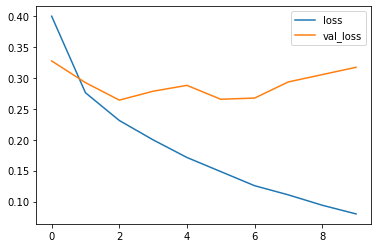

In [27]:
losses_accs[['loss','val_loss']].plot()

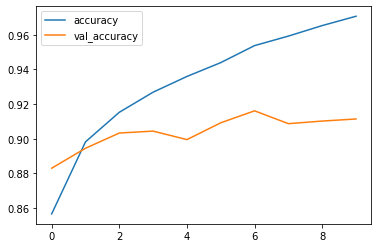

In [28]:
losses_accs[['accuracy','val_accuracy']].plot()

In [22]:
model.metrics_names

['loss', 'accuracy']

In [30]:
model.evaluate(x_train,y_train_cat)

60000/60000 [==============================] - 6s 102us/sample - loss: 0.0634 - accuracy: 0.9779


[0.06344925879389048, 0.97791666]

In [31]:
model.evaluate(x_test,y_test_cat)

10000/10000 [==============================] - 1s 110us/sample - loss: 0.3172 - accuracy: 0.9114


[0.3171708583712578, 0.9114]

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
predictions = model.predict_classes(x_test)

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.81      0.90      0.85      1000
           3       0.93      0.91      0.92      1000
           4       0.87      0.82      0.85      1000
           5       0.98      0.99      0.98      1000
           6       0.77      0.72      0.75      1000
           7       0.96      0.97      0.97      1000
           8       0.98      0.99      0.99      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



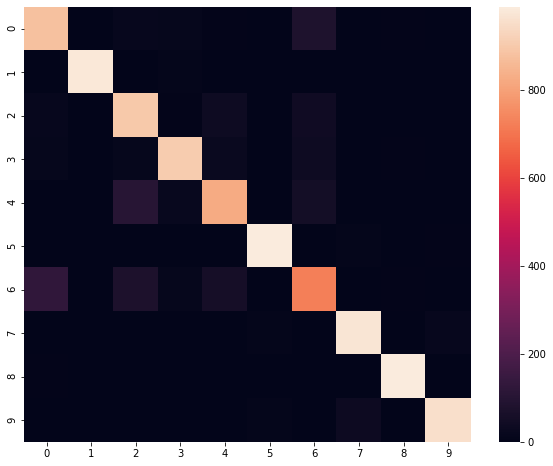

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,predictions))

# Saving model

In [42]:
model.save('CNN_FashionMNIS_Classification.h5')